# McCabe-Thiele Methode:
## Methanol(1)-Wasser(2)
Quellen:

[1] Baerns, Manfred ; Behr, Arno ; Brehm, Axel ; Gmehling, Jürgen ; Hinrichsen, Kai-Olaf ; Hofmann, Hanns ; Onken, Ulfert ; Palkovits, Regina ; Renken, Albert: Technische Chemie. New York: John Wiley & Sons, 2014.

### Fall 1.

| Spec | Symbol | Wert |
| - | - | - |
| Feed | $z_F$ | 0,30 |
| Destillat | $x_D$ | 0,98 |
| Sumpf | $x_B$ | 0,02 |
| Druck | $P$  | 100 kPa |
| Rücklaufverhätlnis | $\nu$ | 1,4 $\nu_{min}$ |

x1=0,1	T= 87,87°C	err: 2,28e-10%	y1= 0,4121	y2= 0,5879



<IPython.core.display.Latex object>

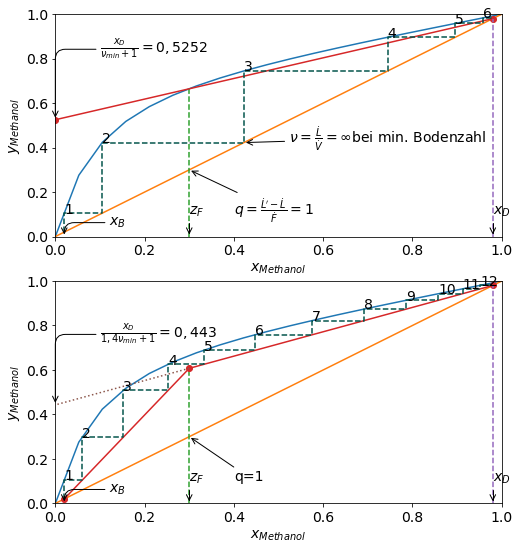

In [1]:
import numpy as np
import locale
from scipy.optimize import root
from matplotlib import pyplot as plt
from IPython.display import Latex
locale.setlocale(locale.LC_ALL, '')
%matplotlib inline
plt.rcParams['font.size'] = 14.0

p = 100.  # kPa
x1d = 0.98
x1b = 0.02
z1f = 0.30
q = 1
rlv_faktor = 1.4

# Antoine
a = np.array([7.20587, 7.19621])
b  = np.array([1582.271, 1730.63])  # °C
c = np.array([239.726, 233.426])  # °C

v = np.array([40.73, 18.07])  # cm^3/mol
delta_lambda12 = 54.04  # K
delta_lambda21 = 236.3  # K 

t0 = 90  # °C (Erster Schätzwert)
x1 = 0.1
x2 = 1-x1
t = t0 + 273.15
def opt_fun(t, xi):
    global p1, p2, err, p1_s, p2_s, gamma1, gamma2
    x1 = xi[0]
    x2 = xi[1]
    p1_s, p2_s = 10**(a-b/(c+t-273.15))  # kPa
    lambda12 = v[1]/v[0] * np.exp(-delta_lambda12 / (t))
    lambda21 = v[0]/v[1] * np.exp(-delta_lambda21 / (t))
    ln_gamma1 = -np.log(x1+lambda12*x2)+x2*(
        lambda12/(x1+lambda12*x2)-lambda21/(lambda21*x1+x2))
    ln_gamma2 = -np.log(x2+lambda21*x1)-x1*(
        lambda12/(x1+lambda12*x2)-lambda21/(lambda21*x1+x2))
    gamma1 = np.exp(ln_gamma1)
    gamma2 = np.exp(ln_gamma2)
    p1, p2 = [x1 * gamma1 * p1_s , x2 * gamma2 * p2_s]
    y1, y2 = [p1,p2]/sum([p1,p2])
    err = (sum([p1,p2])-p)/p
    y1, y2 = p1/p, p2/p
    return err
soln = root(lambda t: opt_fun(t, [x1, 1-x1]), t0+273.15)
t = soln.x
y1, y2 = p1/p, p2/p
print(
        'x1=' +
        locale.format('%0.4g', x1) + '\t' + 'T= ' +
        locale.format('%0.4g', t-273.15) +
        '°C' + '\t' + 'err: ' + 
        locale.format('%0.3g', err*100) + '%' + '\t' +
        'y1= ' + locale.format('%0.4g', y1) +  '\t'
        'y2= ' + locale.format('%0.4g', y2)
)
print('')

x1 = np.linspace(0,1,20)
y1 = np.zeros(len(x1))
t = np.zeros(len(x1))
for i in range(len(x1)):    
    t[i] = root(lambda t: opt_fun(t, [x1[i], 1-x1[i]]), 
          t0+273.15).x  - 273.15
    y1[i] = p1 / p

# Verstärkungsgerade bei (L/V)_min als
# y = mx + b
m = (np.interp(z1f, x1, y1)-x1d)/(z1f-x1d)
b = x1d - m * x1d
nu_min = x1d/b - 1

# Verstärkungsgerade bei (L/V)_min als
# y = mx + b
nu_arbeit = rlv_faktor * nu_min
b_arbeit = x1d/(rlv_faktor * nu_min + 1)
m_arbeit = (b_arbeit-x1d)/(0-x1d)



# plot
fig = plt.figure(1, figsize=[8,9])
ax = plt.subplot2grid([2,1],[0,0])
ax.plot(x1,y1)
ax.plot(x1,x1)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel('$x_{Methanol}$')
ax.set_ylabel('$y_{Methanol}$')

str_nu_min = r'$\frac{x_D}{\nu_{min}+1}='+  \
            locale.format('%0.4g', b) + '$'
str_nu_unendlich = r'$\nu=\frac{\dot L}{\dot V}=\infty$' + \
            'bei min. Bodenzahl'
str_nu_arbeit = r'$\frac{x_D}{'+\
            locale.format('%0.4g', rlv_faktor)+\
            r'\nu_{min}+1}='+  \
            locale.format('%0.4g', b_arbeit) + '$'
ax.plot([z1f, z1f], [0, np.interp(z1f, x1, y1)], '--')
ax.plot([x1d, 0], [x1d, b], '-o')
ax.plot([x1d, x1d], [0, x1d], '--')
ax.annotate(s='$z_{F}$', xy=[z1f,0], xytext=[z1f, 0.1],
           arrowprops=dict(arrowstyle="->", 
                           connectionstyle=
                           "angle,angleA=0,angleB=90,rad=10"))
ax.annotate(s='$x_{B}$', xy=[x1b,0], xytext=[x1b+0.1, 0.05],
           arrowprops=dict(arrowstyle="->", 
                           connectionstyle=
                           "angle,angleA=0,angleB=90,rad=10"))
ax.annotate(s='$x_{D}$', xy=[x1d,0], xytext=[x1d, 0.1],
           arrowprops=dict(arrowstyle="->", 
                           connectionstyle=
                           "angle,angleA=0,angleB=90,rad=10"))
ax.annotate(s=str_nu_min, xy=[0,b], xytext=[0.1, b+0.3],
           arrowprops=dict(arrowstyle="->", 
                           connectionstyle=
                           "angle,angleA=0,angleB=90,rad=10"))

x_min_stufen = [x1b]
y_min_stufen = [x1b]
x_boden = x1b
for i in range(6):
    y_gleichgewicht = np.interp(x_boden, x1, y1)
    x_min_stufen.append(x_boden)
    y_min_stufen.append(y_gleichgewicht)
    ax.text(x_boden, y_gleichgewicht ,str(i+1))
    x_boden = y_gleichgewicht
    x_min_stufen.append(x_boden)
    y_min_stufen.append(x_boden)
    
ax.plot(x_min_stufen, y_min_stufen, '--',
        color='xkcd:dark blue green')
ax.annotate(s=str_nu_unendlich, 
            xy=[x_min_stufen[4], y_min_stufen[4]], 
            xytext=[x_min_stufen[4]+0.1, y_min_stufen[4]],
           arrowprops=dict(arrowstyle="->"))
ax.annotate(s=r"$q=\frac{\dot L' - \dot L}{\dot F}=1$", 
            xy=[z1f, z1f], 
            xytext=[z1f+0.1, z1f-0.2],
           arrowprops=dict(arrowstyle="->"))

ax2 = plt.subplot2grid([2,1],[1,0])
ax2.plot(x1,y1)
ax2.plot(x1,x1)
ax2.set_xlim([0,1])
ax2.set_ylim([0,1])
ax2.set_xlabel('$x_{Methanol}$')
ax2.set_ylabel('$y_{Methanol}$')
ax2.plot([z1f, z1f], [0, z1f*m_arbeit+b_arbeit], '--')
ax2.plot([x1d, z1f, x1b], [x1d, z1f*m_arbeit+b_arbeit, x1b], '-o')
ax2.plot([x1d, x1d], [0, x1d], '--')
ax2.annotate(s='$z_{F}$', xy=[z1f,0], xytext=[z1f, 0.1],
           arrowprops=dict(arrowstyle="->", 
                           connectionstyle=
                           "angle,angleA=0,angleB=90,rad=10"))
ax2.annotate(s='$x_{B}$', xy=[x1b,0], xytext=[x1b+0.1, 0.05],
           arrowprops=dict(arrowstyle="->", 
                           connectionstyle=
                           "angle,angleA=0,angleB=90,rad=10"))
ax2.annotate(s='$x_{D}$', xy=[x1d,0], xytext=[x1d, 0.1],
           arrowprops=dict(arrowstyle="->", 
                           connectionstyle=
                           "angle,angleA=0,angleB=90,rad=10"))
ax2.annotate(s=str_nu_arbeit, xy=[0,b_arbeit],
             xytext=[0.1, b_arbeit+0.3],
           arrowprops=dict(arrowstyle="->", 
                           connectionstyle=
                           "angle,angleA=0,angleB=90,rad=10"))

x_stufen = [x1b]
y_stufen = [x1b]
x_boden = x1b
for i in range(12):
    y_gleichgewicht = np.interp(x_boden, x1, y1)
    x_stufen.append(x_boden)
    y_stufen.append(y_gleichgewicht)
    ax2.text(x_boden, y_gleichgewicht ,str(i+1))
    x_boden = np.interp(y_gleichgewicht,                         
                        [x1b, z1f*m_arbeit+b_arbeit, x1d],
                        [x1b, z1f, x1d])
    x_stufen.append(x_boden)
    y_stufen.append(y_gleichgewicht)
    
ax2.plot(x_stufen, y_stufen, '--',
        color='xkcd:dark blue green')
ax2.plot([z1f, 0], [z1f*m_arbeit+b_arbeit, b_arbeit], ':')
ax2.annotate(s='q=1', 
            xy=[z1f, z1f], 
            xytext=[z1f+0.1, z1f-0.2],
           arrowprops=dict(arrowstyle="->"))


Latex(str_nu_min + r'$\quad\Rightarrow \nu_{min}= '+ 
      locale.format('%0.4g', nu_min) + r'\\'+
      r'\text{Verstärkungsgerade: } \nu='+
      locale.format('%0.4g', rlv_faktor)+
      r'\nu_{min}= '+ 
      locale.format('%0.4g', rlv_faktor*nu_min)+'$')

In [2]:
0.991/0.68-1

0.4573529411764705

In [3]:
0.98/0.53-1

0.8490566037735847

In [4]:
[1.4*0.4573, 1.4*0.85]

[0.6402199999999999, 1.19]

In [5]:
0.991/(1.4*0.4573+1)

0.6041872431746962

### Fall 2.

| Spec | Symbol | Wert |
| - | - | - |
| Feed | $z_F$ | 0,75 |
| Destillat | $x_D$ | 0,991 (entspricht 0,995 Massenanteil)|
| Sumpf | $x_B$ | 0,02 |
| Druck | $P$  | 101,325 kPa |
| Rücklaufverhätlnis | $\nu$ | 2,8 $\nu_{min}$ |

x1=0,1	T= 88,24°C	err: 5,03e-11%	y1= 0,4116	y2= 0,5884



<IPython.core.display.Latex object>

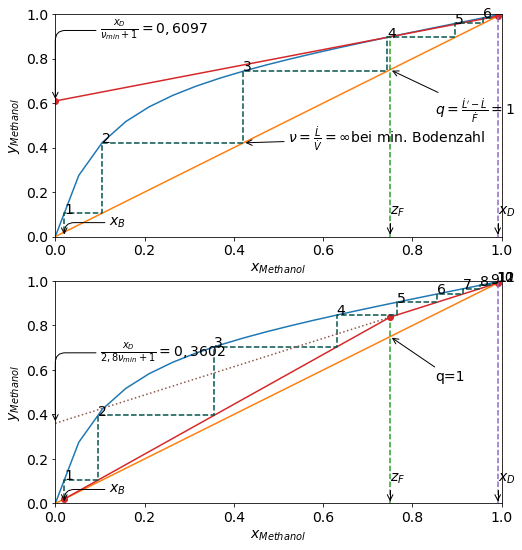

In [6]:
import numpy as np
import locale
from scipy.optimize import root
from matplotlib import pyplot as plt
from IPython.display import Latex
locale.setlocale(locale.LC_ALL, '')
%matplotlib inline
plt.rcParams['font.size'] = 14.0

p = 101.325  # kPa
x1d = 0.991
x1b = 0.02
z1f = 0.75
q = 1
rlv_faktor = 2.8

# Antoine
a = np.array([7.20587, 7.19621])
b  = np.array([1582.271, 1730.63])  # °C
c = np.array([239.726, 233.426])  # °C

v = np.array([40.73, 18.07])  # cm^3/mol
delta_lambda12 = 54.04  # K
delta_lambda21 = 236.3  # K 

t0 = 90  # °C (Erster Schätzwert)
x1 = 0.1
x2 = 1-x1
t = t0 + 273.15
def opt_fun(t, xi):
    global p1, p2, err, p1_s, p2_s, gamma1, gamma2
    x1 = xi[0]
    x2 = xi[1]
    p1_s, p2_s = 10**(a-b/(c+t-273.15))  # kPa
    lambda12 = v[1]/v[0] * np.exp(-delta_lambda12 / (t))
    lambda21 = v[0]/v[1] * np.exp(-delta_lambda21 / (t))
    ln_gamma1 = -np.log(x1+lambda12*x2)+x2*(
        lambda12/(x1+lambda12*x2)-lambda21/(lambda21*x1+x2))
    ln_gamma2 = -np.log(x2+lambda21*x1)-x1*(
        lambda12/(x1+lambda12*x2)-lambda21/(lambda21*x1+x2))
    gamma1 = np.exp(ln_gamma1)
    gamma2 = np.exp(ln_gamma2)
    p1, p2 = [x1 * gamma1 * p1_s , x2 * gamma2 * p2_s]
    y1, y2 = [p1,p2]/sum([p1,p2])
    err = (sum([p1,p2])-p)/p
    y1, y2 = p1/p, p2/p
    return err
soln = root(lambda t: opt_fun(t, [x1, 1-x1]), t0+273.15)
t = soln.x
y1, y2 = p1/p, p2/p
print(
        'x1=' +
        locale.format('%0.4g', x1) + '\t' + 'T= ' +
        locale.format('%0.4g', t-273.15) +
        '°C' + '\t' + 'err: ' + 
        locale.format('%0.3g', err*100) + '%' + '\t' +
        'y1= ' + locale.format('%0.4g', y1) +  '\t'
        'y2= ' + locale.format('%0.4g', y2)
)
print('')

x1 = np.linspace(0,1,20)
y1 = np.zeros(len(x1))
t = np.zeros(len(x1))
for i in range(len(x1)):    
    t[i] = root(lambda t: opt_fun(t, [x1[i], 1-x1[i]]), 
          t0+273.15).x  - 273.15
    y1[i] = p1 / p

# Verstärkungsgerade bei (L/V)_min als
# y = mx + b
m = (np.interp(z1f, x1, y1)-x1d)/(z1f-x1d)
b = x1d - m * x1d
nu_min = x1d/b - 1

# Verstärkungsgerade bei (L/V)_min als
# y = mx + b
nu_arbeit = rlv_faktor * nu_min
b_arbeit = x1d/(rlv_faktor * nu_min + 1)
m_arbeit = (b_arbeit-x1d)/(0-x1d)



# plot
fig = plt.figure(1, figsize=[8,9])
ax = plt.subplot2grid([2,1],[0,0])
ax.plot(x1,y1)
ax.plot(x1,x1)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel('$x_{Methanol}$')
ax.set_ylabel('$y_{Methanol}$')

str_nu_min = r'$\frac{x_D}{\nu_{min}+1}='+  \
            locale.format('%0.4g', b) + '$'
str_nu_unendlich = r'$\nu=\frac{\dot L}{\dot V}=\infty$' + \
            'bei min. Bodenzahl'
str_nu_arbeit = r'$\frac{x_D}{'+ \
            locale.format('%0.4g', rlv_faktor)+\
            r'\nu_{min}+1}='+  \
            locale.format('%0.4g', b_arbeit) + '$'
ax.plot([z1f, z1f], [0, np.interp(z1f, x1, y1)], '--')
ax.plot([x1d, 0], [x1d, b], '-o')
ax.plot([x1d, x1d], [0, x1d], '--')
ax.annotate(s='$z_{F}$', xy=[z1f,0], xytext=[z1f, 0.1],
           arrowprops=dict(arrowstyle="->", 
                           connectionstyle=
                           "angle,angleA=0,angleB=90,rad=10"))
ax.annotate(s='$x_{B}$', xy=[x1b,0], xytext=[x1b+0.1, 0.05],
           arrowprops=dict(arrowstyle="->", 
                           connectionstyle=
                           "angle,angleA=0,angleB=90,rad=10"))
ax.annotate(s='$x_{D}$', xy=[x1d,0], xytext=[x1d, 0.1],
           arrowprops=dict(arrowstyle="->", 
                           connectionstyle=
                           "angle,angleA=0,angleB=90,rad=10"))
ax.annotate(s=str_nu_min, xy=[0,b], xytext=[0.1, b+0.3],
           arrowprops=dict(arrowstyle="->", 
                           connectionstyle=
                           "angle,angleA=0,angleB=90,rad=10"))

x_min_stufen = [x1b]
y_min_stufen = [x1b]
x_boden = x1b
for i in range(6):
    y_gleichgewicht = np.interp(x_boden, x1, y1)
    x_min_stufen.append(x_boden)
    y_min_stufen.append(y_gleichgewicht)
    ax.text(x_boden, y_gleichgewicht ,str(i+1))
    x_boden = y_gleichgewicht
    x_min_stufen.append(x_boden)
    y_min_stufen.append(x_boden)
    
ax.plot(x_min_stufen, y_min_stufen, '--',
        color='xkcd:dark blue green')
ax.annotate(s=str_nu_unendlich, 
            xy=[x_min_stufen[4], y_min_stufen[4]], 
            xytext=[x_min_stufen[4]+0.1, y_min_stufen[4]],
           arrowprops=dict(arrowstyle="->"))
ax.annotate(s=r"$q=\frac{\dot L' - \dot L}{\dot F}=1$", 
            xy=[z1f, z1f], 
            xytext=[z1f+0.1, z1f-0.2],
           arrowprops=dict(arrowstyle="->"))

ax2 = plt.subplot2grid([2,1],[1,0])
ax2.plot(x1,y1)
ax2.plot(x1,x1)
ax2.set_xlim([0,1])
ax2.set_ylim([0,1])
ax2.set_xlabel('$x_{Methanol}$')
ax2.set_ylabel('$y_{Methanol}$')
ax2.plot([z1f, z1f], [0, z1f*m_arbeit+b_arbeit], '--')
ax2.plot([x1d, z1f, x1b], [x1d, z1f*m_arbeit+b_arbeit, x1b], '-o')
ax2.plot([x1d, x1d], [0, x1d], '--')
ax2.annotate(s='$z_{F}$', xy=[z1f,0], xytext=[z1f, 0.1],
           arrowprops=dict(arrowstyle="->", 
                           connectionstyle=
                           "angle,angleA=0,angleB=90,rad=10"))
ax2.annotate(s='$x_{B}$', xy=[x1b,0], xytext=[x1b+0.1, 0.05],
           arrowprops=dict(arrowstyle="->", 
                           connectionstyle=
                           "angle,angleA=0,angleB=90,rad=10"))
ax2.annotate(s='$x_{D}$', xy=[x1d,0], xytext=[x1d, 0.1],
           arrowprops=dict(arrowstyle="->", 
                           connectionstyle=
                           "angle,angleA=0,angleB=90,rad=10"))
ax2.annotate(s=str_nu_arbeit, xy=[0,b_arbeit],
             xytext=[0.1, b_arbeit+0.3],
           arrowprops=dict(arrowstyle="->", 
                           connectionstyle=
                           "angle,angleA=0,angleB=90,rad=10"))

x_stufen = [x1b]
y_stufen = [x1b]
x_boden = x1b
for i in range(12):
    y_gleichgewicht = np.interp(x_boden, x1, y1)
    x_stufen.append(x_boden)
    y_stufen.append(y_gleichgewicht)
    ax2.text(x_boden, y_gleichgewicht ,str(i+1))
    x_boden = np.interp(y_gleichgewicht,                         
                        [x1b, z1f*m_arbeit+b_arbeit, x1d],
                        [x1b, z1f, x1d])
    x_stufen.append(x_boden)
    y_stufen.append(y_gleichgewicht)
    
ax2.plot(x_stufen, y_stufen, '--',
        color='xkcd:dark blue green')
ax2.plot([z1f, 0], [z1f*m_arbeit+b_arbeit, b_arbeit], ':')
ax2.annotate(s='q=1', 
            xy=[z1f, z1f], 
            xytext=[z1f+0.1, z1f-0.2],
           arrowprops=dict(arrowstyle="->"))


Latex(str_nu_min + r'$\quad\Rightarrow \nu_{min}= '+ 
      locale.format('%0.4g', nu_min) + r'\\'+
      r'\text{Verstärkungsgerade: } \nu='+
      locale.format('%0.2g', rlv_faktor)+r'\nu_{min}= '+ 
      locale.format('%0.4g', rlv_faktor*nu_min)+'$')